# Evaluation

Now we have 3 models which were aiming for and will now perform evaluations on each models primarily in these 4 categories:
1. Residual Analysis
2. Assumption Checks (Explicitly Named)
3. Multicollinearity Check
4. Error Segmentation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sys
import os

src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

In [6]:
# importing/ loading the models:
import joblib
pipeline_lr = joblib.load('../models/pipeline_lr.joblib')
pipeline_self_mlr = joblib.load('../models/pipeline_self_mlr.joblib')
pipe_poly = joblib.load('../models/pipe_poly.joblib')

# data as well for evaluation:
x_train = joblib.load('../models/x_train.joblib')
x_test = joblib.load('../models/x_test.joblib')
y_train = joblib.load('../models/y_train.joblib')
y_test = joblib.load('../models/y_test.joblib')


In [8]:
import evaluate as eval


Diagnostics for LR

 Residual Analysis


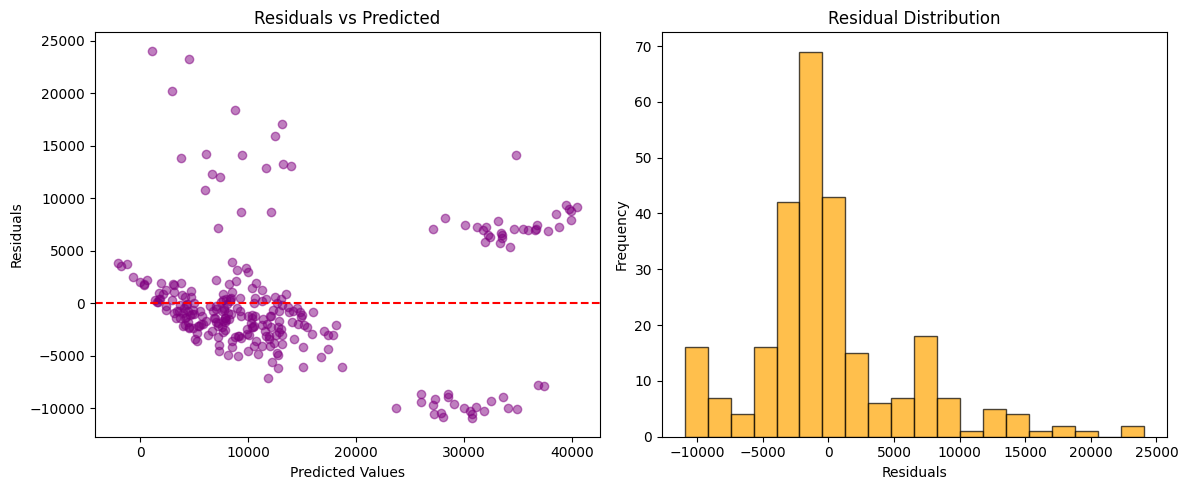

Residuals mean: 75.4903 | Residuals std: 5873.0769

 Assumption Checks


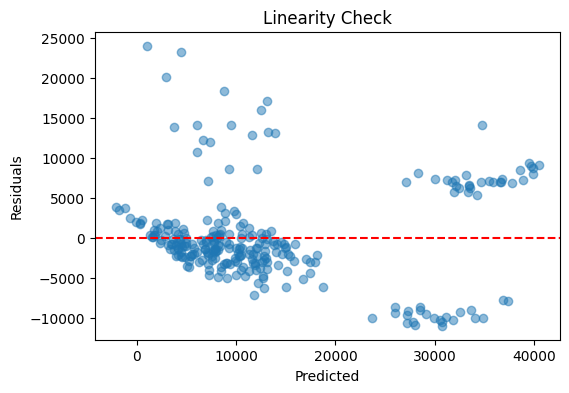

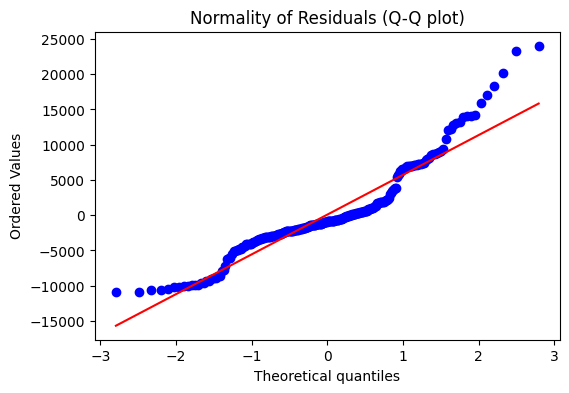

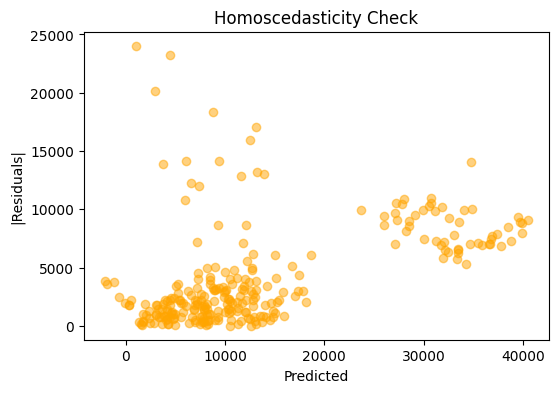

Assumptions checked: Linearity, Normality, Homoscedasticity.

 Multicollinearity Check (features are independent of model)

=== Multicollinearity Check (VIF) ===
            Feature        VIF
7  region_southeast  13.248409
5  region_northeast  10.753446
6  region_northwest   9.587265
8  region_southwest   9.537905
2               bmi   1.093274
1               sex   1.037080
0               age   1.035991
3          children   1.030892
4            smoker   1.016227

 Error Segmentation (using feature index 0)


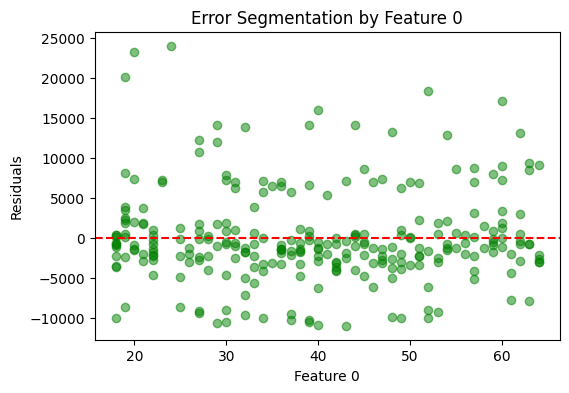

Mean residual for feature 0: 75.4903

Diagnostics for MyMLR

 Residual Analysis


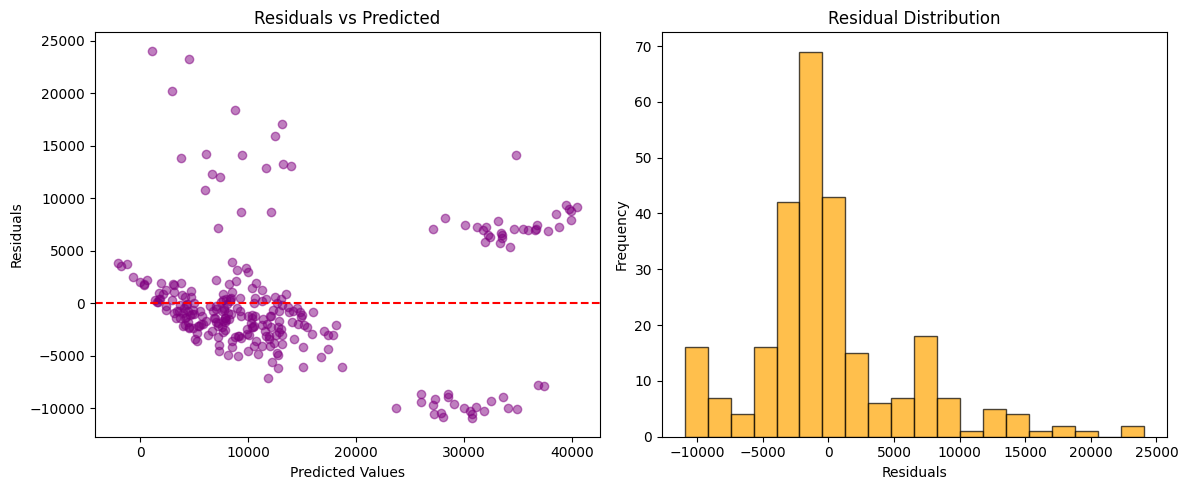

Residuals mean: 75.4904 | Residuals std: 5873.0769

 Assumption Checks


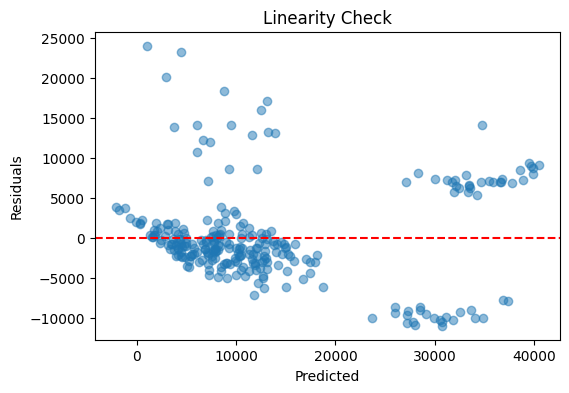

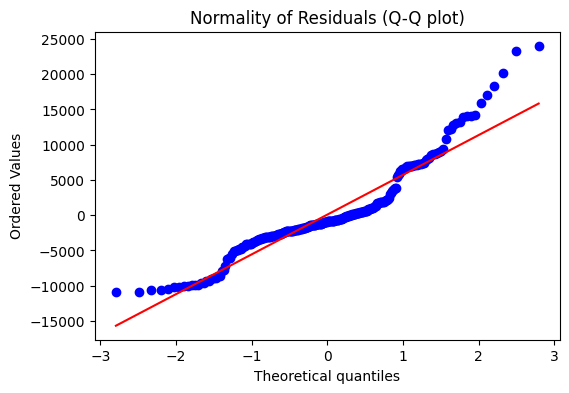

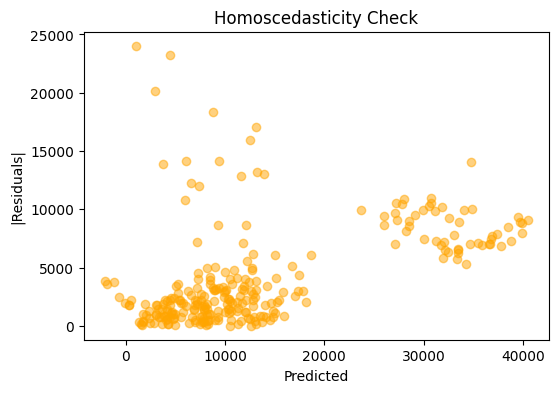

Assumptions checked: Linearity, Normality, Homoscedasticity.

 Multicollinearity Check (features are independent of model)

 Error Segmentation (using feature index 0)


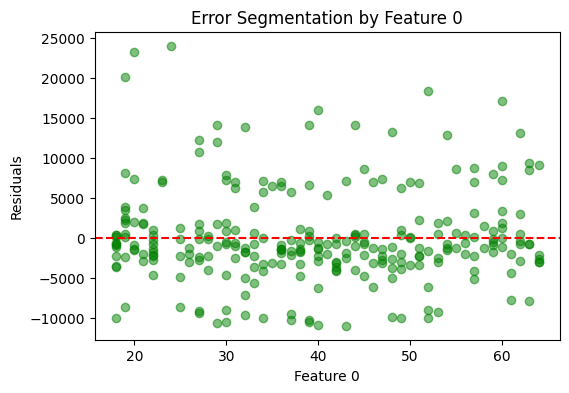

Mean residual for feature 0: 75.4904

Diagnostics for Poly

 Residual Analysis


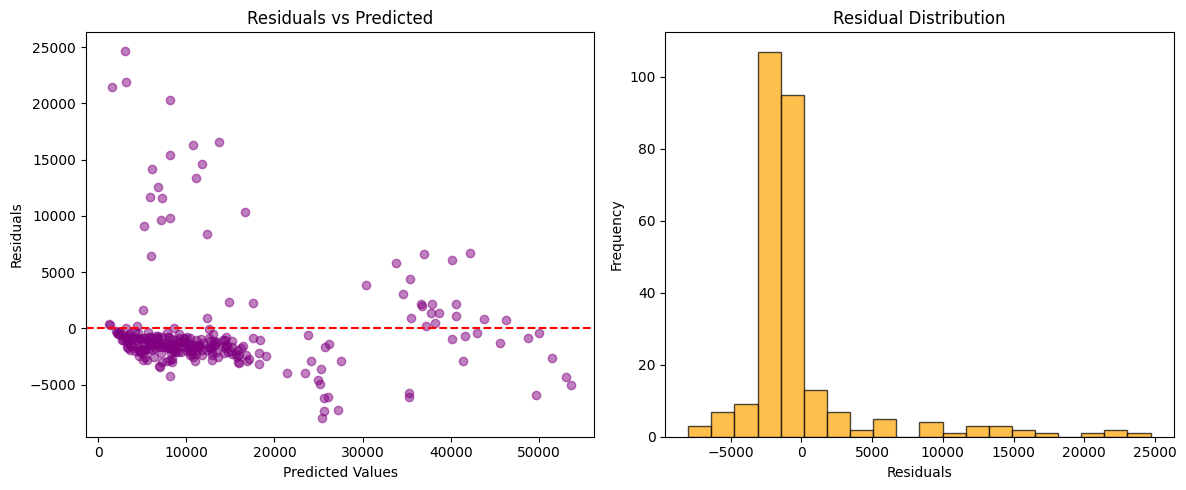

Residuals mean: -284.1656 | Residuals std: 4582.2676

 Assumption Checks


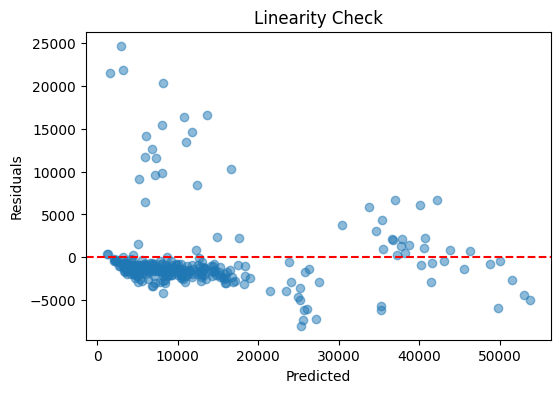

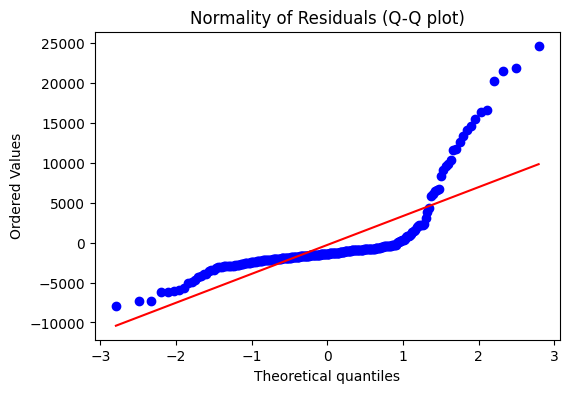

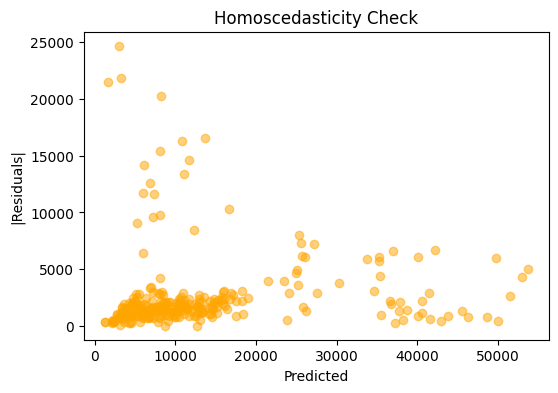

Assumptions checked: Linearity, Normality, Homoscedasticity.

 Multicollinearity Check (features are independent of model)

 Error Segmentation (using feature index 0)


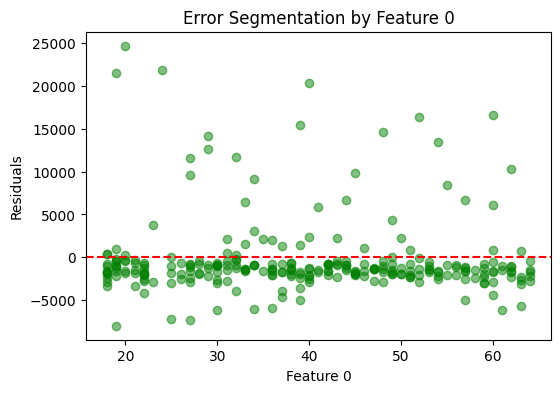

Mean residual for feature 0: -284.1656


In [9]:
pipelines = {
    'LR': pipeline_lr,
    'MyMLR': pipeline_self_mlr,
    'Poly': pipe_poly
}

for name, pipe in pipelines.items():
    print(f"\n{'='*30}\nDiagnostics for {name}\n{'='*30}")

    print("\n Residual Analysis")
    eval.residual_analysis(pipe, x_test, y_test)

    print("\n Assumption Checks")
    eval.assumption_checks(pipe, x_test, y_test)

    print("\n Multicollinearity Check (features are independent of model)")
    if name == 'LR':  # Run once on the original features, e.g. on LR model's input features
        eval.multicollinearity_check(x_test)

    print("\n Error Segmentation (using feature index 0)")
    eval.error_segmentation(pipe, x_test, y_test, feature_idx=0)



--- Analyzing LR ---


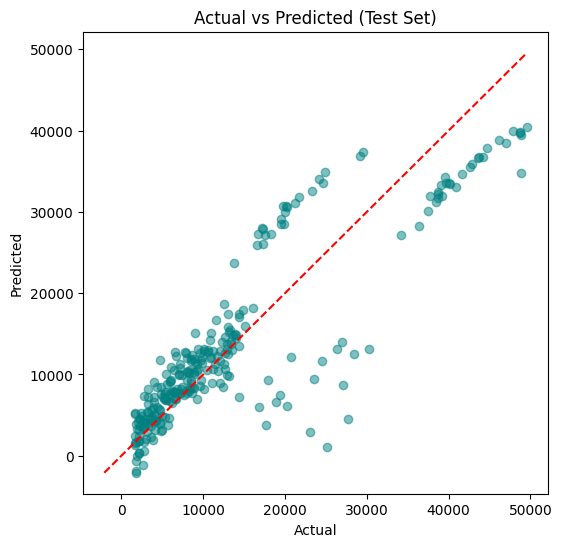

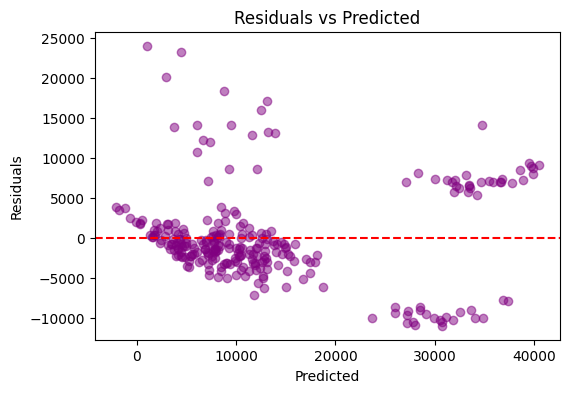


=== Feature Coefficients ===
            Feature  Coefficient
4            smoker -9549.990025
0               age  3610.959807
2               bmi  1984.324392
3          children   628.384328
5  region_northeast   317.358516
8  region_southwest  -223.983133
7  region_southeast  -209.292220
6  region_northwest   125.743961
1               sex   -59.992494
Intercept: 13180.42696448636


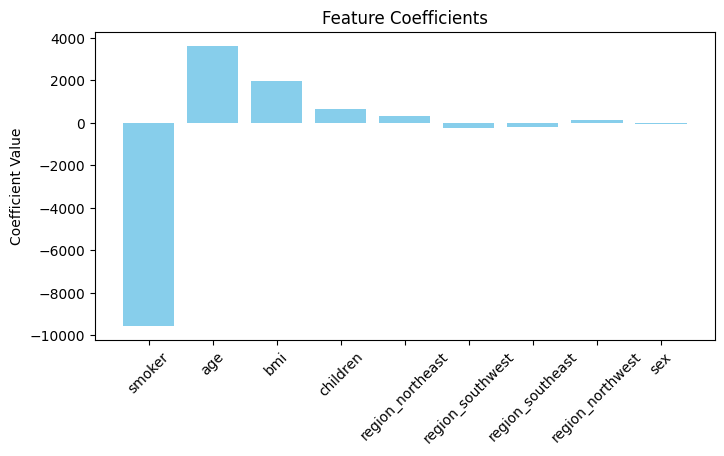

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


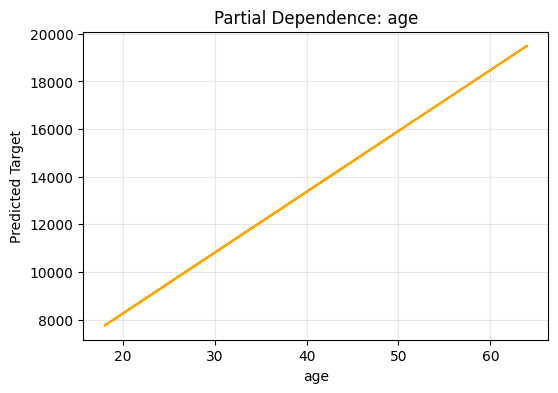

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


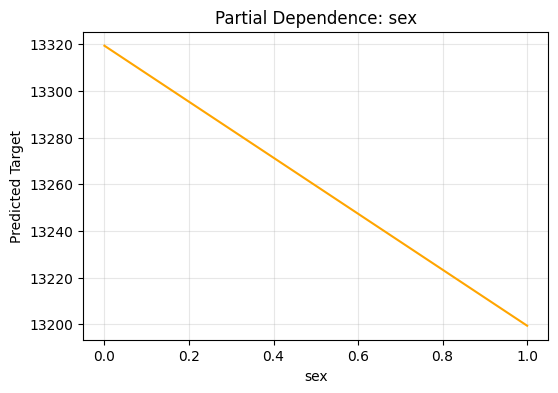

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


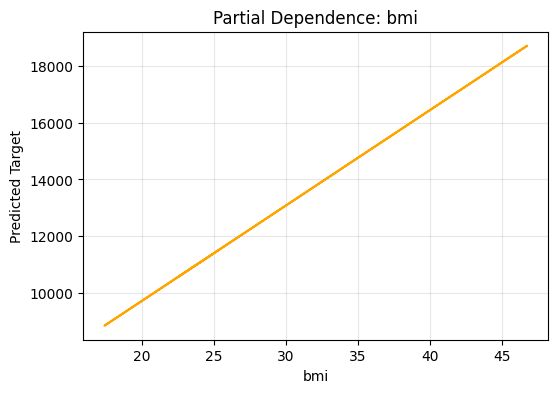

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


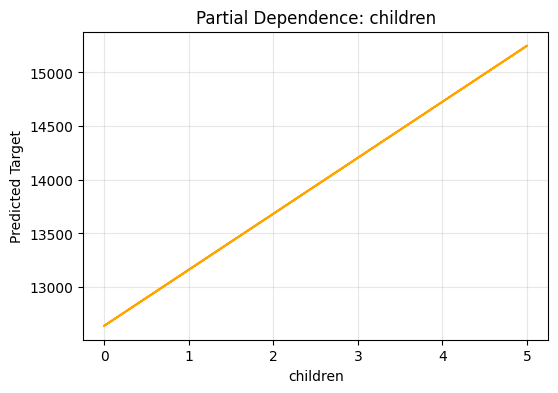

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


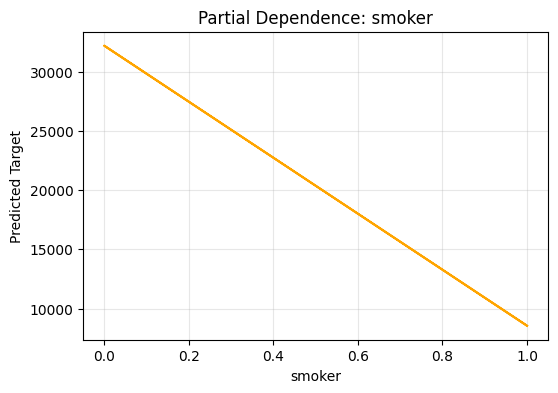

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


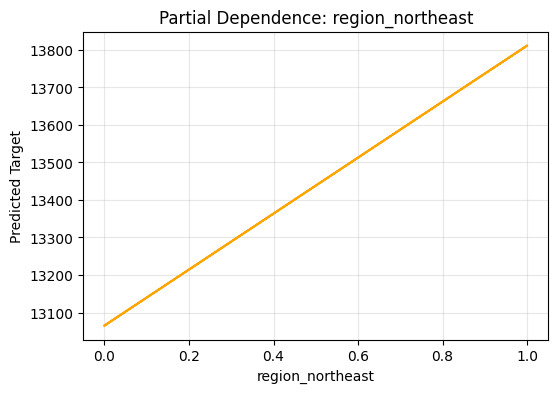

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


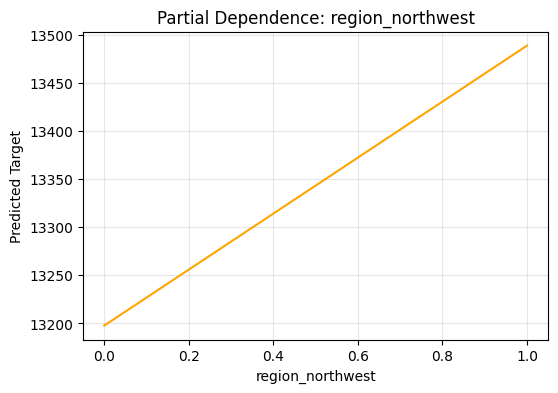

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


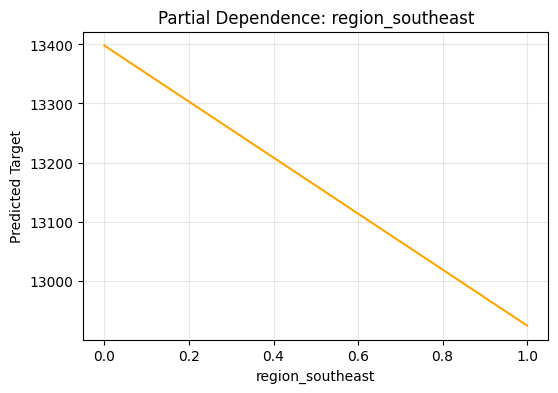

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


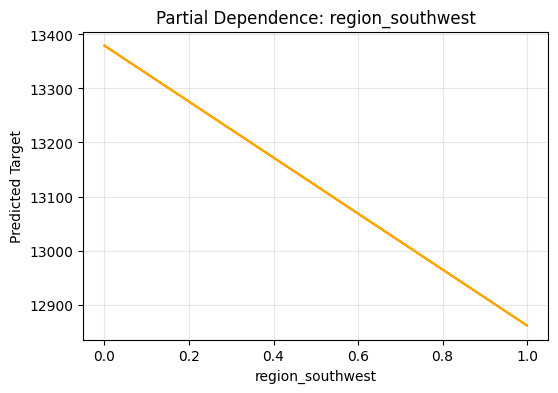

Train MSE: 36336869.3241 | Test MSE: 34498730.9469
Train R²: 0.7454 | Test R²: 0.7671

--- Analyzing MyMLR ---


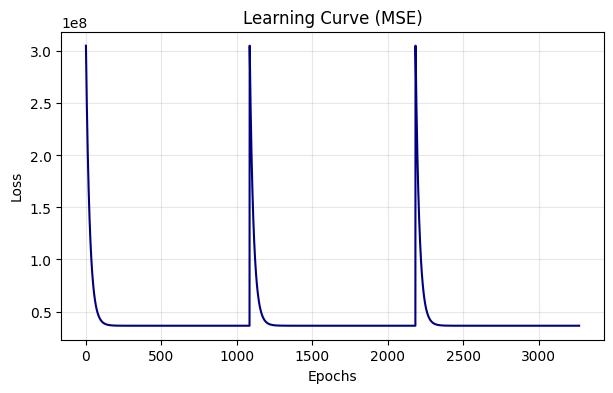

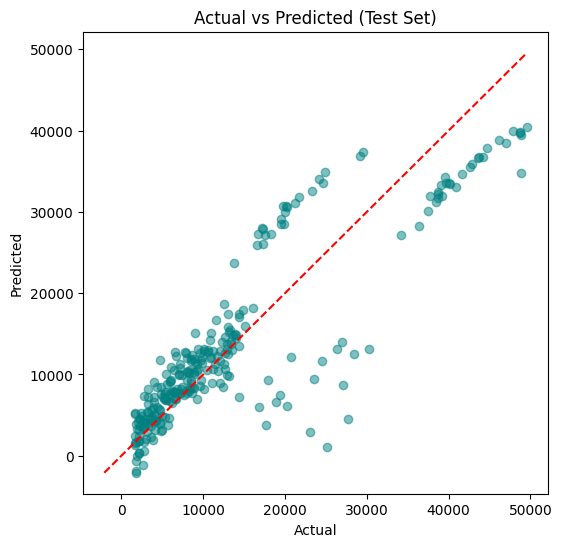

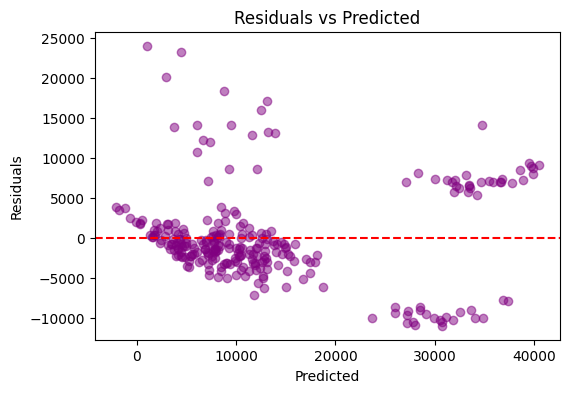


=== Feature Coefficients ===
            Feature  Coefficient
4            smoker -9549.989982
0               age  3610.959870
2               bmi  1984.324254
3          children   628.384332
5  region_northeast   317.358481
8  region_southwest  -223.983136
7  region_southeast  -209.292150
6  region_northwest   125.743927
1               sex   -59.992460
Intercept: 13180.426960503255


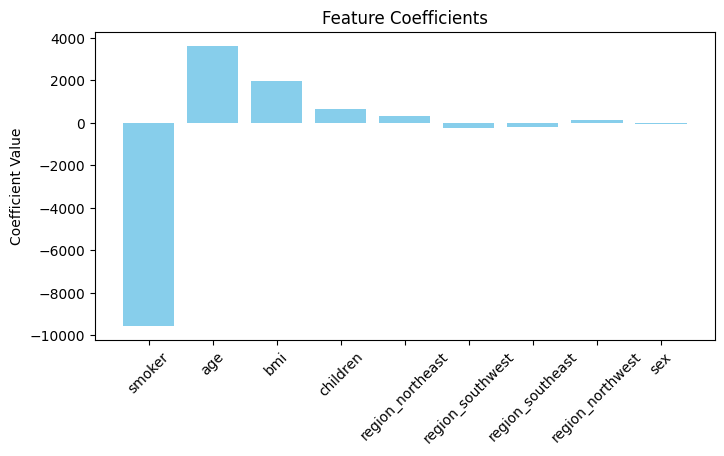

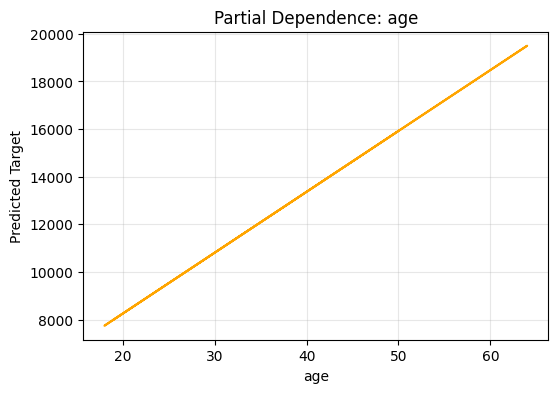

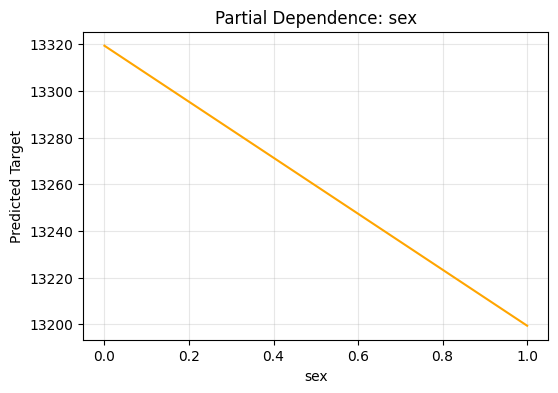

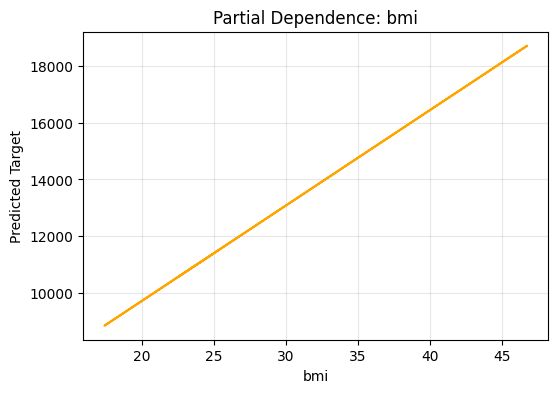

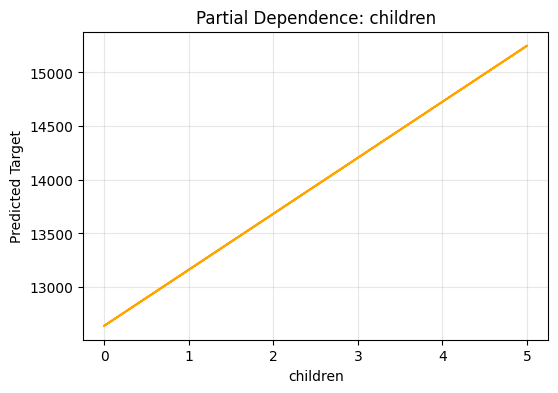

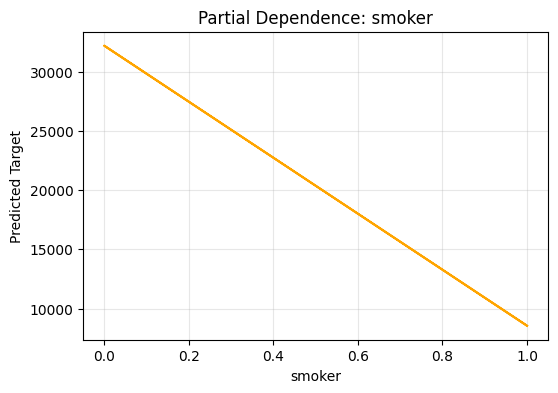

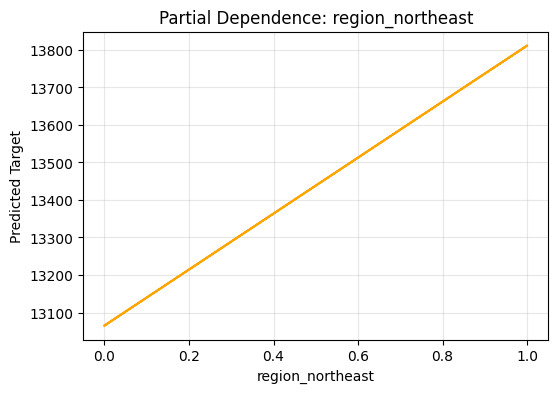

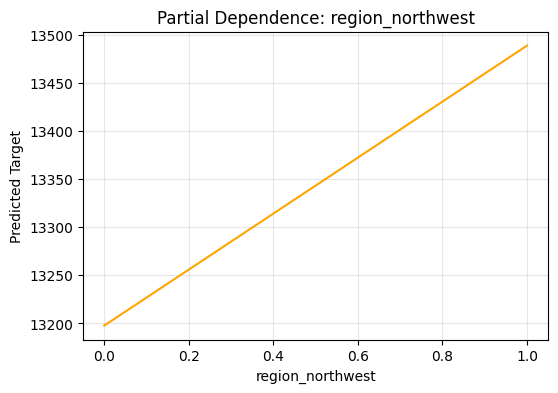

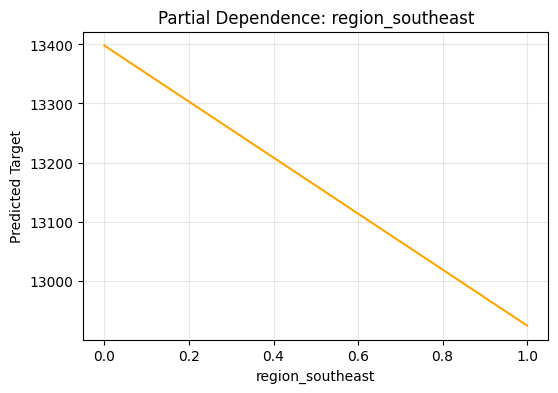

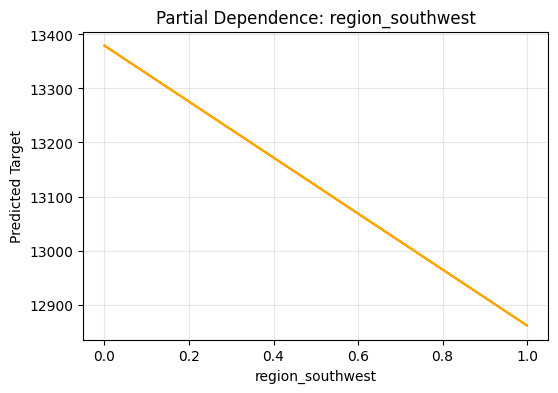

Train MSE: 36336869.3241 | Test MSE: 34498730.9376
Train R²: 0.7454 | Test R²: 0.7671

--- Analyzing Poly ---


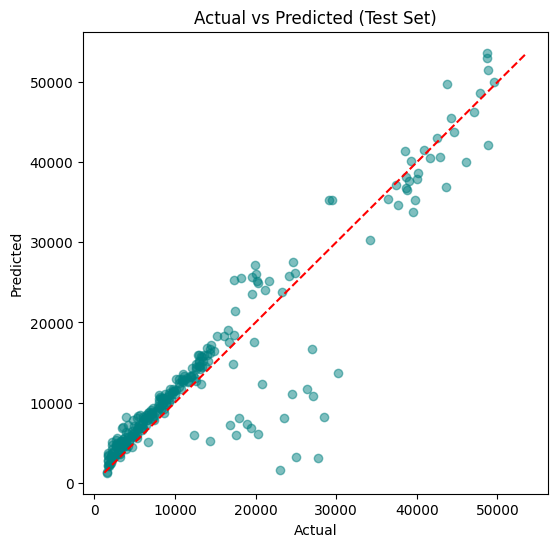

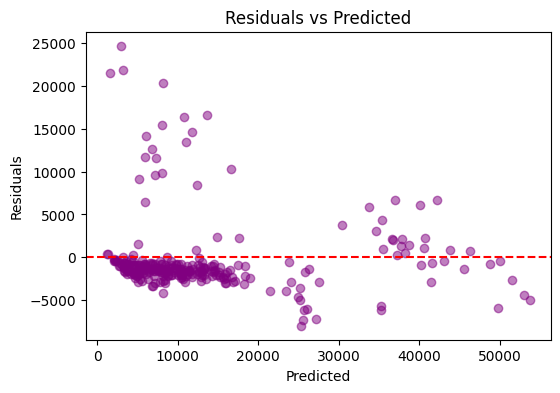


=== Feature Coefficients ===
       Feature   Coefficient
29  Feature 29 -2.013784e+04
3    Feature 3  1.011164e+04
10  Feature 10  4.898551e+03
40  Feature 40  3.673379e+03
5    Feature 5  3.673379e+03
30  Feature 30  1.981669e+03
27  Feature 27 -1.854171e+03
1    Feature 1 -1.537039e+03
31  Feature 31  1.268735e+03
43  Feature 43  1.225436e+03
42  Feature 42  1.117606e+03
33  Feature 33  9.337899e+02
15  Feature 15 -9.232132e+02
41  Feature 41  8.342367e+02
4    Feature 4  7.371911e+02
16  Feature 16 -6.986270e+02
35  Feature 35  6.417101e+02
44  Feature 44  5.431119e+02
37  Feature 37  5.289851e+02
34  Feature 34 -4.448754e+02
11  Feature 11  4.363441e+02
14  Feature 14  3.970167e+02
32  Feature 32  3.885799e+02
36  Feature 36  3.535887e+02
12  Feature 12  3.462167e+02
38  Feature 38  2.665493e+02
19  Feature 19 -2.566375e+02
2    Feature 2 -2.566375e+02
21  Feature 21 -2.396023e+02
17  Feature 17  2.367005e+02
23  Feature 23 -2.260358e+02
18  Feature 18  1.953342e+02
26  Feature 2

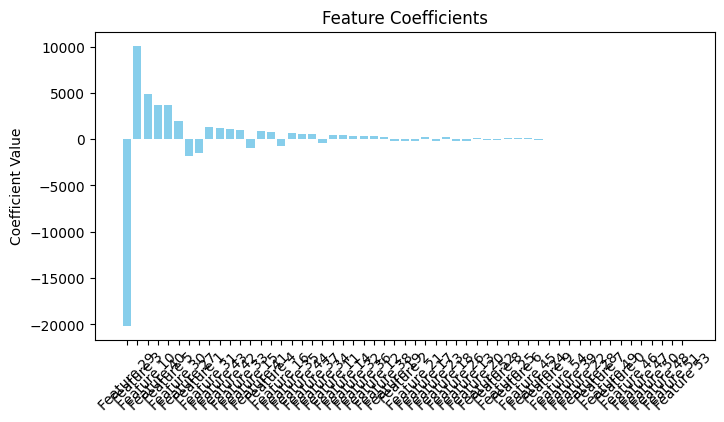

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


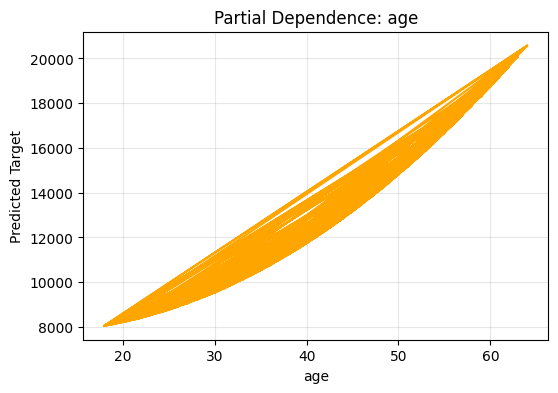

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


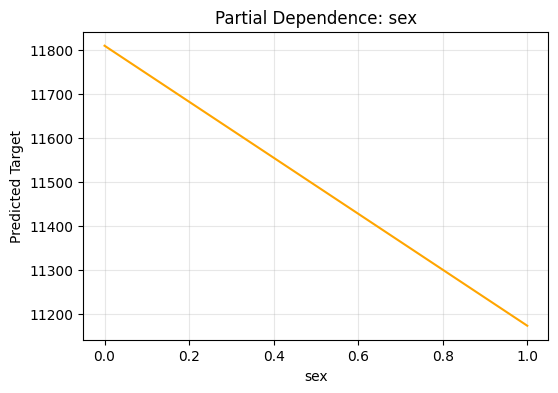

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


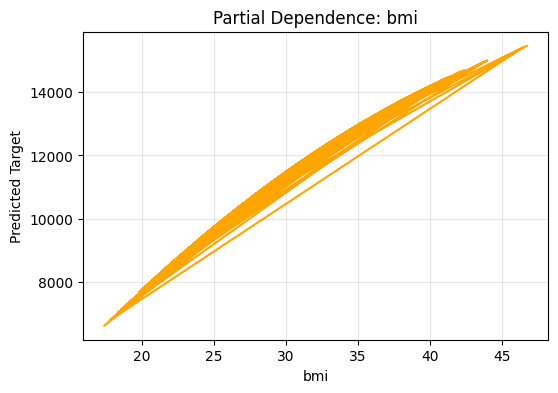

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


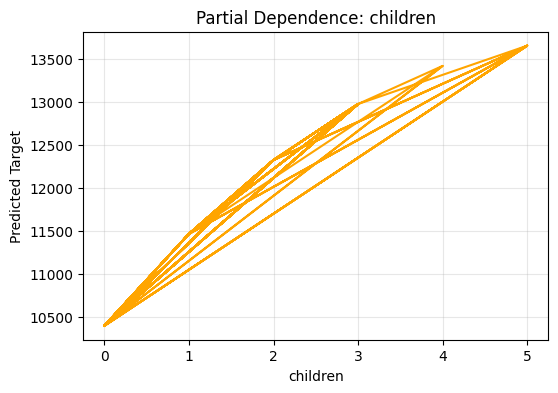

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


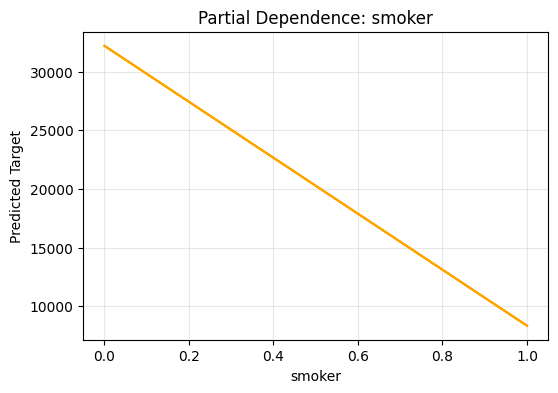

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


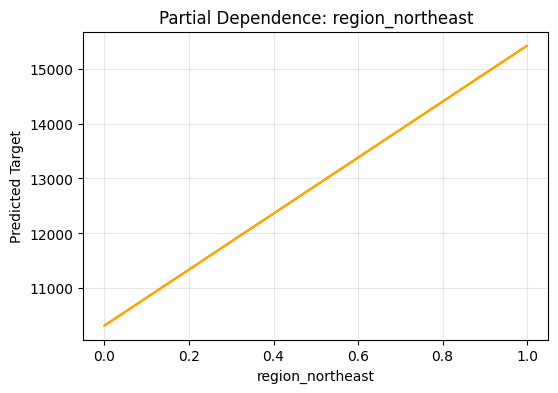

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


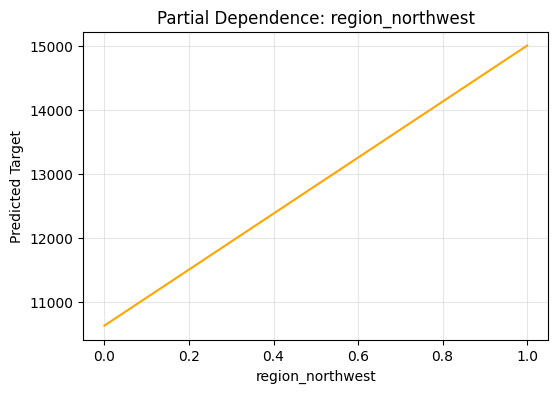

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


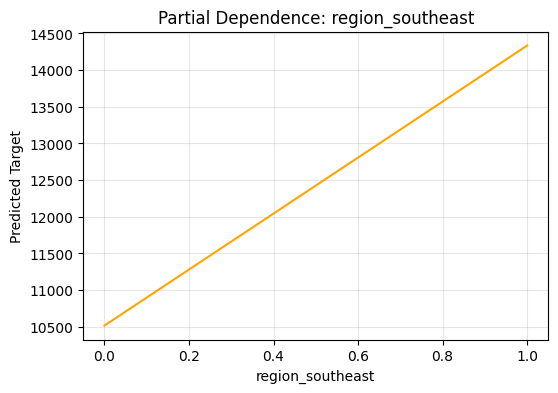

c:\xtra\Last_Chance\git_re\inexorable-ML\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


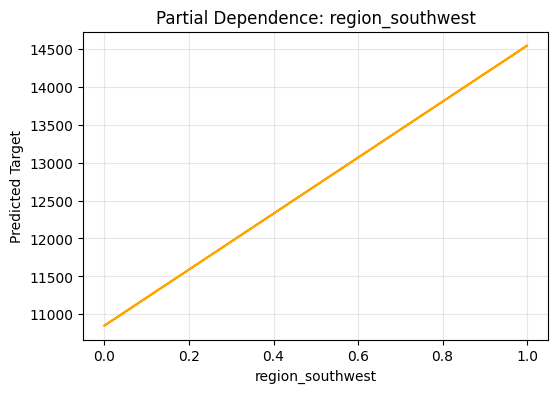

Train MSE: 22666192.1634 | Test MSE: 21077926.7012
Train R²: 0.8412 | Test R²: 0.8577


In [10]:
for name, pipe in pipelines.items():
    print(f"\n--- Analyzing {name} ---")
    eval.analyze_model(pipe, x_train, y_train, x_test, y_test, partial_dependence=True)


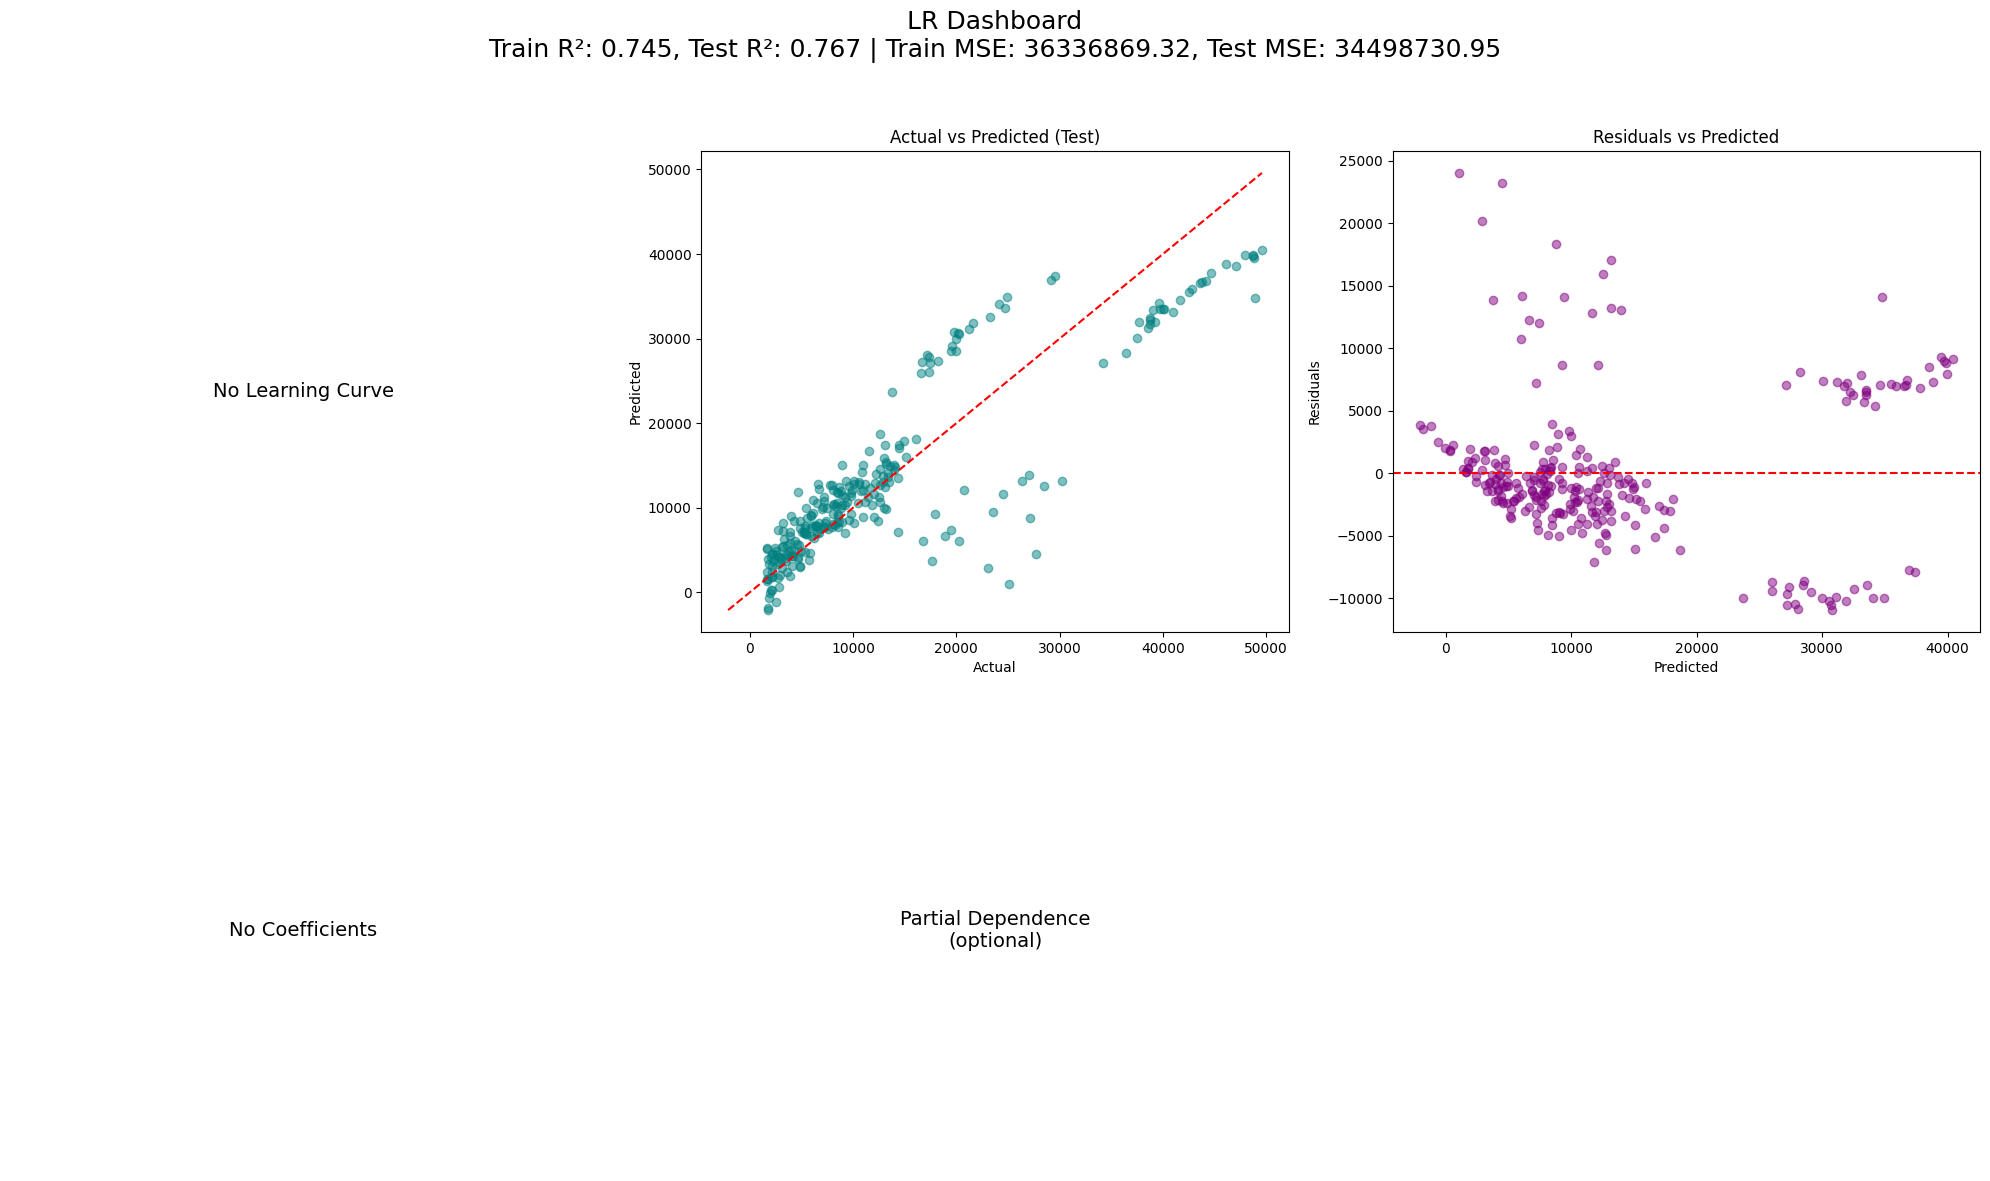

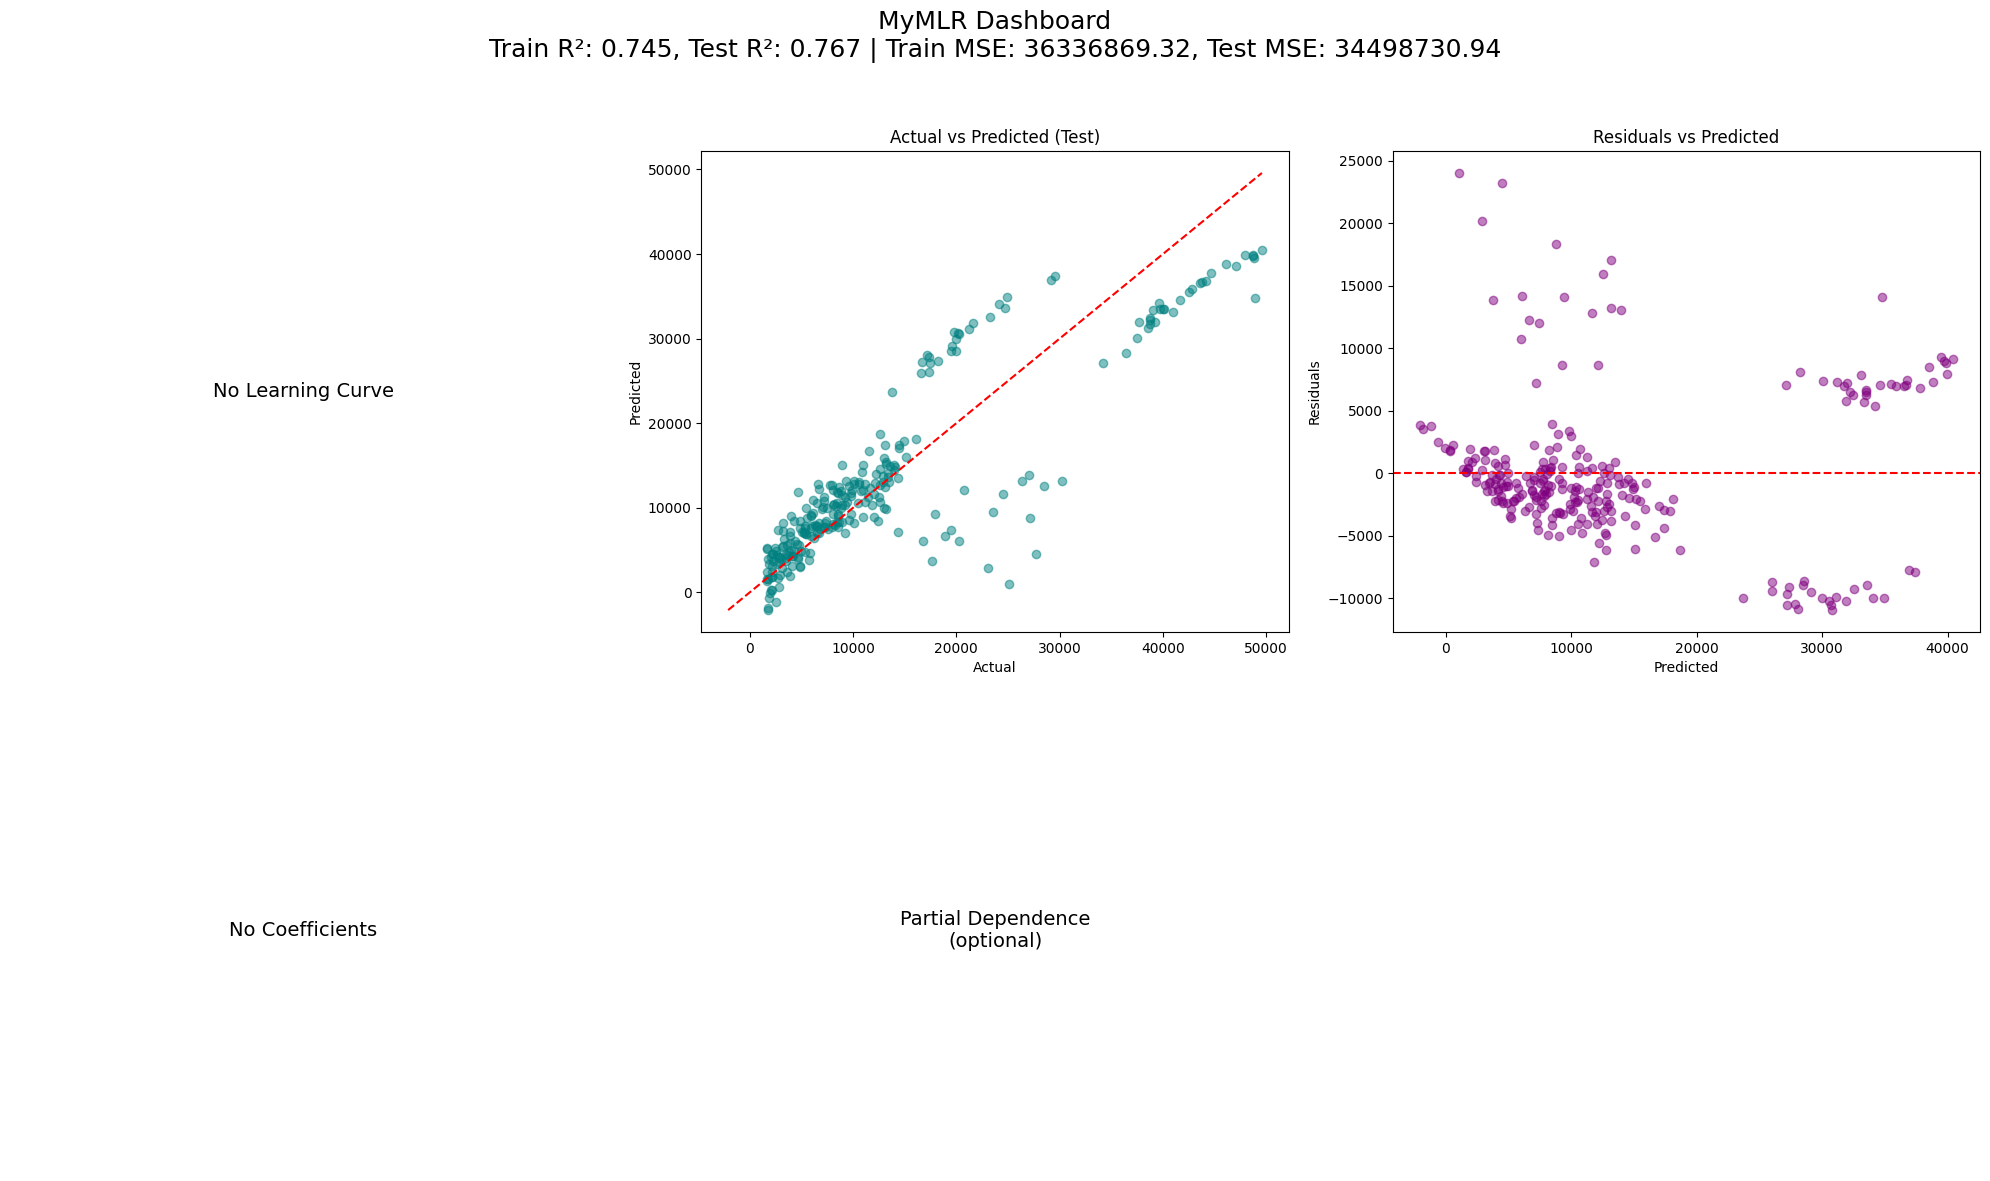

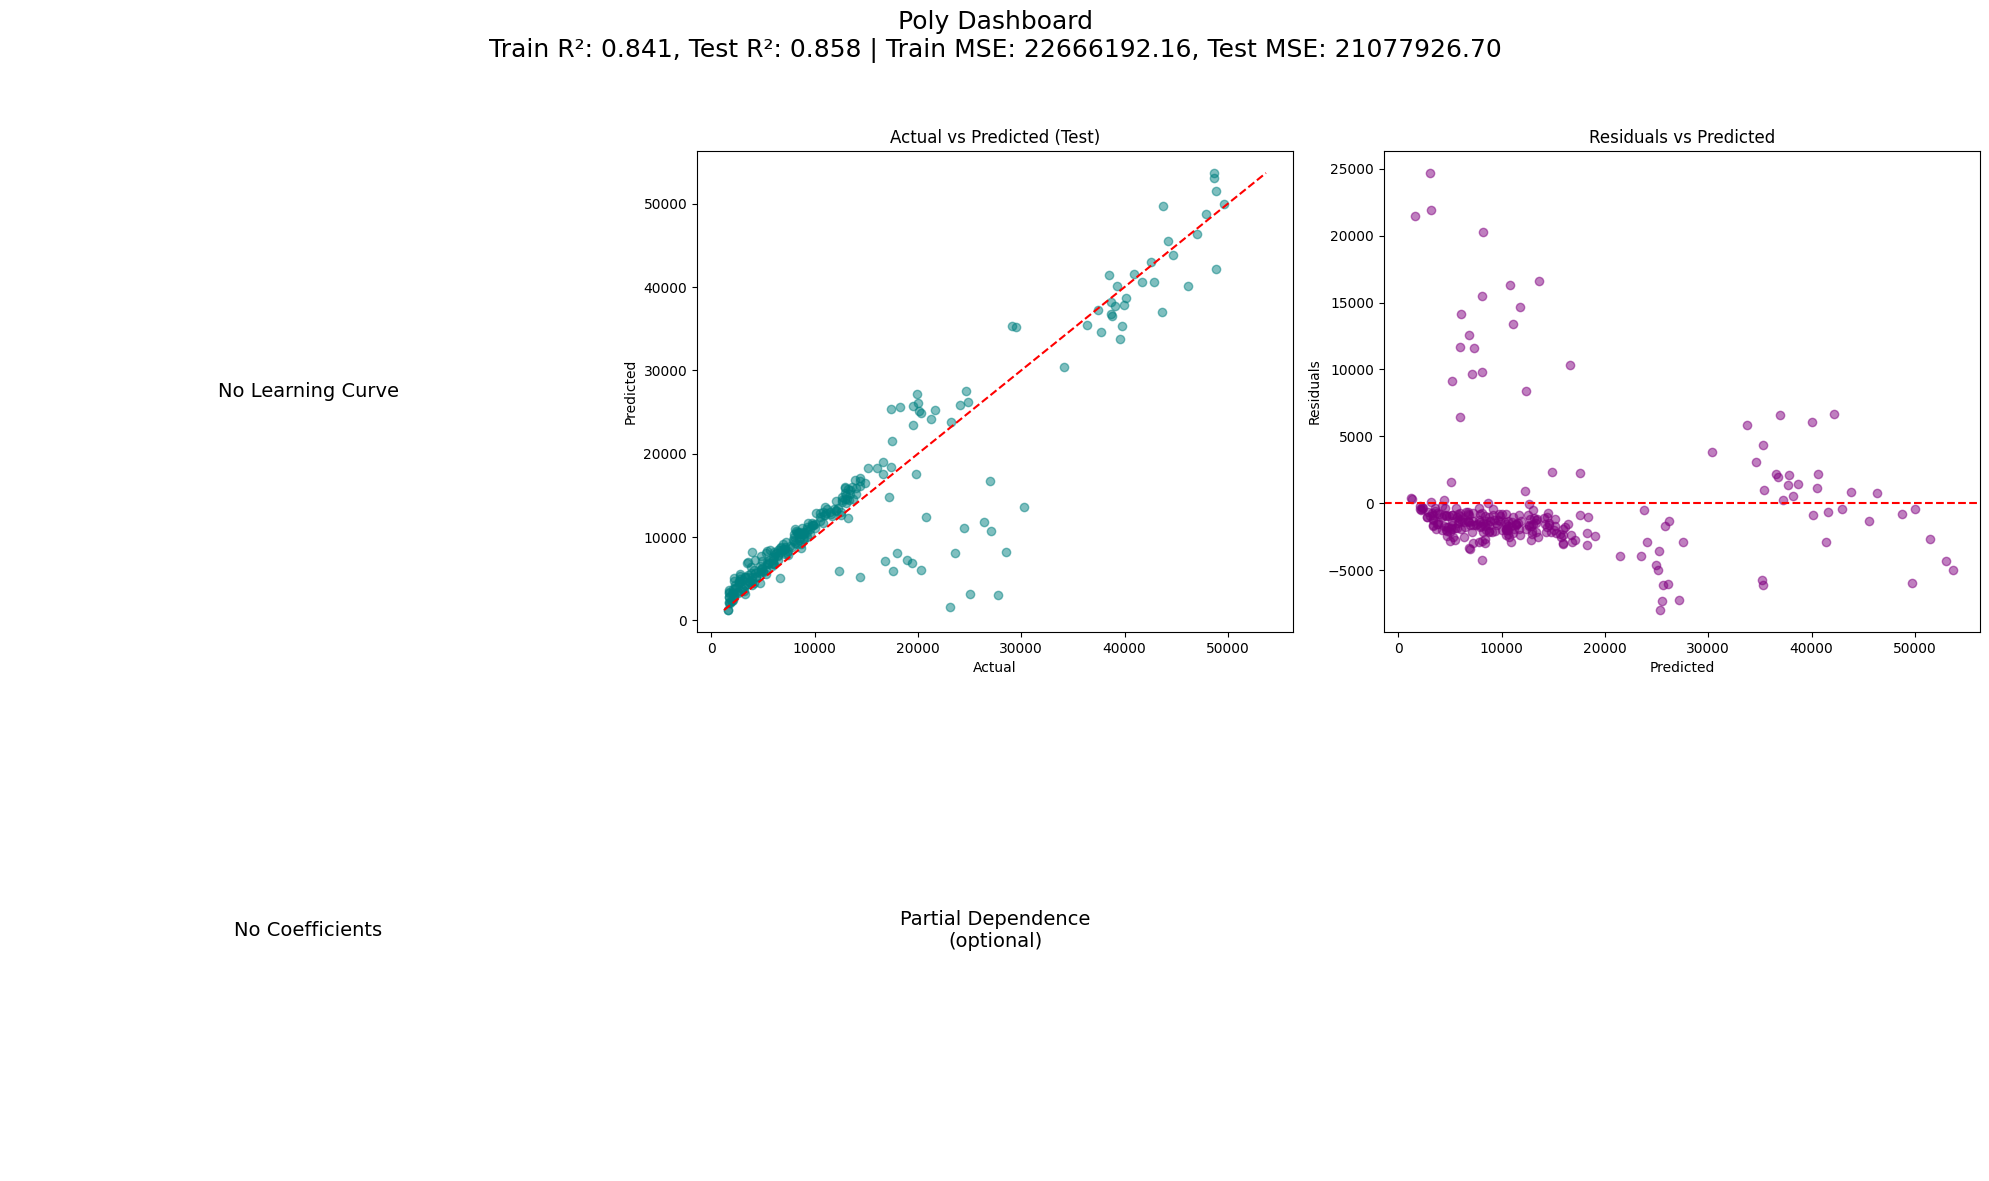

In [11]:
for name, pipe in pipelines.items():
    eval.dashboard_model(pipe, x_train, y_train, x_test, y_test, model_name=name, partial_dependence=True)

## Description of metrics (What You Evaluated and What It Tells You)

### 1. **Mean Squared Error (MSE)**

* **What it is:**
  The average of squared differences between predicted and actual values. Penalizes larger errors more than smaller errors.

* **What it tells you:**
  How close your model’s predictions are to the true values in terms of squared error units. Lower MSE means better performance.

* **When useful:**
  When you want to focus on overall prediction accuracy and penalize big mistakes heavily.

---

### 2. **R² Score (Coefficient of Determination)**

* **What it is:**
  Measures the proportion of variance in the target variable explained by the model.

* **What it tells you:**
  How well your model fits the data. Ranges from 0 to 1 (or can be negative if model is worse than predicting the mean). Closer to 1 is better.

* **When useful:**
  To understand how much of the variability in insurance charges your model captures.

---

### 3. **Residual Analysis**

* **What it is:**
  Plots and examines the differences between predicted and actual values (residuals).

* **What it tells you:**

  * Whether errors are randomly distributed (good) or show patterns (bad).
  * Detects bias, heteroscedasticity (changing variance), or outliers.

* **Common plots:**

  * Residuals vs Predicted: Should look random around zero line.
  * Histogram of residuals: Should be roughly normal distribution.

---

### 4. **Assumption Checks for Linear Regression**

* **What it is:**
  Explicit checks on key assumptions like linearity, normality of residuals, homoscedasticity (constant variance), and independence.

* **What it tells you:**
  If your model satisfies the theoretical assumptions of linear regression, meaning your inferences and predictions are more reliable.

* **Visual checks:**

  * Residuals vs Predicted (linearity)
  * Q-Q plot of residuals (normality)
  * Residuals magnitude vs Predicted (homoscedasticity)

---

### 5. **Multicollinearity Check (Variance Inflation Factor - VIF)**

* **What it is:**
  Measures how much a feature is correlated with other features.

* **What it tells you:**
  Whether some predictors are redundant or highly correlated, which can make coefficient estimates unstable and hard to interpret.

* **When to worry:**
  VIF values > 5 or 10 indicate problematic multicollinearity.

---

### 6. **Error Segmentation**

* **What it is:**
  Examines residuals across values of a particular feature.

* **What it tells you:**
  If your model makes larger errors systematically on some feature ranges or groups — helpful for diagnosing model weaknesses or biases.

---

# Overall Interpretation Summary

* **MSE and R²** give you the *quantitative performance* of each model on train/test data.
* **Residual and assumption checks** help you *diagnose problems* with model fit and regression assumptions.
* **Multicollinearity** check helps with *feature reliability* and *interpretability*.
* **Error segmentation** uncovers *where* your model struggles and helps target improvements.

---



# Summary

* **As we can see with the analysis and evaluation of the models we find the similarity between the OLS and Gradient Decent to be neigh 0 as the dataset only housed ~1300 values**
* **Whereas the Polynomial Feature Model outperforms showing the limitation of a linear model to encapsulate all the datapoints accurately**
* **Given the dataset and the results of the evaluation conducted on each models we achieve the maximum r2_score of '0.8577'**
* **Again this project highlights the limitation of a Linear Model and the significant improvement done in the non linear model, despite being such a small dataset**
* **Thus we will conclude this project with the final best joblib(model) saved in the model folder named: 'pipe_poly.joblib' which boosts a 85.77% accuracy to predict the charges for the insurance given the data of the features it is trained on**